# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="+weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_json["coord"]["lat"]
        city_lng = city_json["coord"]["lon"]
        city_max_temp = city_json["main"]["temp_max"]
        city_humidity = city_json["main"]["humidity"]
        city_clouds = city_json["clouds"]["all"]
        city_wind = city_json["wind"]["speed"]
        city_country = city_json["sys"]["country"]
        city_date = city_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | isafjordur
Processing Record 4 of Set 1 | wailua homesteads
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | enewetak
Processing Record 7 of Set 1 | kongolo
Processing Record 8 of Set 1 | thurso
Processing Record 9 of Set 1 | hobyo
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | college
Processing Record 14 of Set 1 | bilibino
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | mejit
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | guerrero negro
Processing Record 20 of Set 1 | beitbridge
Processing Record 21 of Set 1 | petukhovo
Processing Record 22 

Processing Record 40 of Set 4 | necochea
Processing Record 41 of Set 4 | anadyr
Processing Record 42 of Set 4 | sur
Processing Record 43 of Set 4 | lompoc
Processing Record 44 of Set 4 | flin flon
Processing Record 45 of Set 4 | nieuw amsterdam
Processing Record 46 of Set 4 | tabou
Processing Record 47 of Set 4 | wagar
Processing Record 48 of Set 4 | morris
Processing Record 49 of Set 4 | nikolayevsk-on-amure
Processing Record 0 of Set 5 | parana
Processing Record 1 of Set 5 | kerikeri
Processing Record 2 of Set 5 | sandpoint
Processing Record 3 of Set 5 | loreto
Processing Record 4 of Set 5 | kangding
Processing Record 5 of Set 5 | lorengau
Processing Record 6 of Set 5 | severo-yeniseyskiy
Processing Record 7 of Set 5 | gereshk
Processing Record 8 of Set 5 | sisimiut
Processing Record 9 of Set 5 | port elizabeth
Processing Record 10 of Set 5 | tromso
Processing Record 11 of Set 5 | bender
Processing Record 12 of Set 5 | kitui
Processing Record 13 of Set 5 | diawara
Processing Record 1

Processing Record 31 of Set 8 | castillos
Processing Record 32 of Set 8 | marsa alam
Processing Record 33 of Set 8 | cockburn town
Processing Record 34 of Set 8 | tsrar sharif
Processing Record 35 of Set 8 | ratnagiri
Processing Record 36 of Set 8 | syanno
Processing Record 37 of Set 8 | queenstown
Processing Record 38 of Set 8 | tura
Processing Record 39 of Set 8 | nova vicosa
Processing Record 40 of Set 8 | gizo
Processing Record 41 of Set 8 | umatac village
City not found. Skipping...
Processing Record 42 of Set 8 | carloforte
Processing Record 43 of Set 8 | igrim
Processing Record 44 of Set 8 | viseu
Processing Record 45 of Set 8 | lushun
Processing Record 46 of Set 8 | port mathurin
Processing Record 47 of Set 8 | tshikapa
Processing Record 48 of Set 8 | vorzel'
Processing Record 49 of Set 8 | hola
Processing Record 0 of Set 9 | sarangani
Processing Record 1 of Set 9 | dongcun
Processing Record 2 of Set 9 | caras
Processing Record 3 of Set 9 | pirallahi
Processing Record 4 of Set 

Processing Record 19 of Set 12 | hohhot
Processing Record 20 of Set 12 | metlili chaamba
Processing Record 21 of Set 12 | yumaguzino
Processing Record 22 of Set 12 | pontes e lacerda
Processing Record 23 of Set 12 | praia da vitoria
Processing Record 24 of Set 12 | nkowakowa
Processing Record 25 of Set 12 | tulum
Processing Record 26 of Set 12 | westport
Processing Record 27 of Set 12 | isangel
Processing Record 28 of Set 12 | haiku-pauwela
Processing Record 29 of Set 12 | sao joao da barra
Processing Record 30 of Set 12 | illizi
Processing Record 31 of Set 12 | maharajgani
Processing Record 32 of Set 12 | el calafate
Processing Record 33 of Set 12 | vilyuysk
Processing Record 34 of Set 12 | pangody
Processing Record 35 of Set 12 | xiva
Processing Record 36 of Set 12 | ifatsy
City not found. Skipping...
Processing Record 37 of Set 12 | zuni pueblo
Processing Record 38 of Set 12 | colares
Processing Record 39 of Set 12 | contamana
Processing Record 40 of Set 12 | rethymno
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,2.41,76,93,0.72,US,1699923133
1,iqaluit,63.7506,-68.5145,-17.95,64,0,2.57,CA,1699923352
2,isafjordur,66.0755,-23.1240,1.61,86,57,2.89,IS,1699923352
3,wailua homesteads,22.0669,-159.3780,28.24,84,100,6.17,US,1699923352
4,blackmans bay,-43.0167,147.3167,17.51,47,23,1.34,AU,1699923352


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,2.41,76,93,0.72,US,1699923133
1,iqaluit,63.7506,-68.5145,-17.95,64,0,2.57,CA,1699923352
2,isafjordur,66.0755,-23.1240,1.61,86,57,2.89,IS,1699923352
3,wailua homesteads,22.0669,-159.3780,28.24,84,100,6.17,US,1699923352
4,blackmans bay,-43.0167,147.3167,17.51,47,23,1.34,AU,1699923352


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

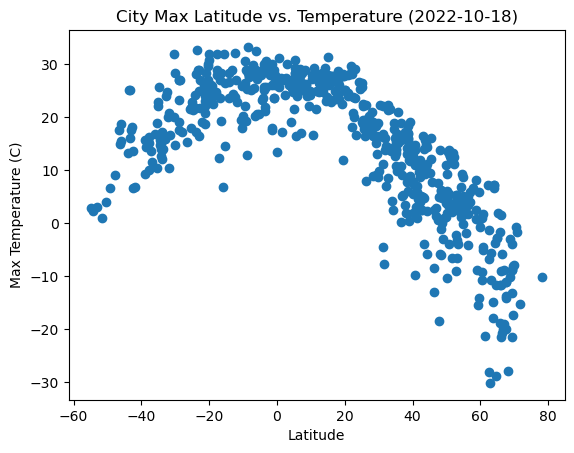

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Max Temp'], marker='o')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

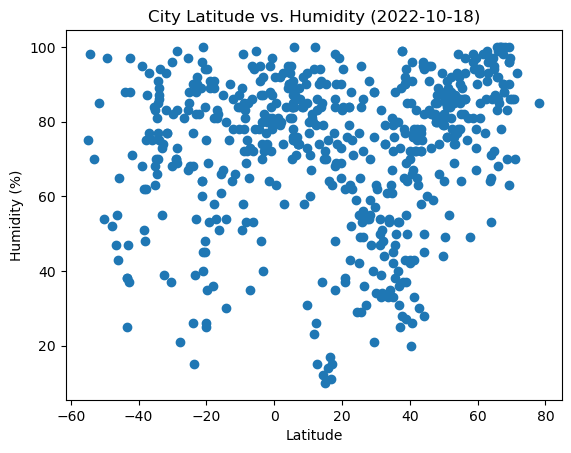

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Humidity'], marker='o')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

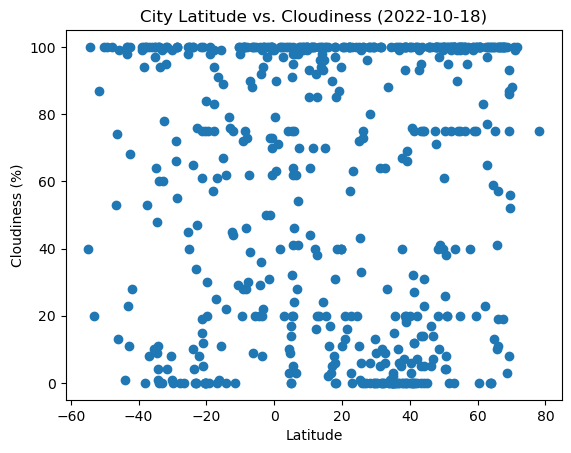

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Cloudiness'], marker='o')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

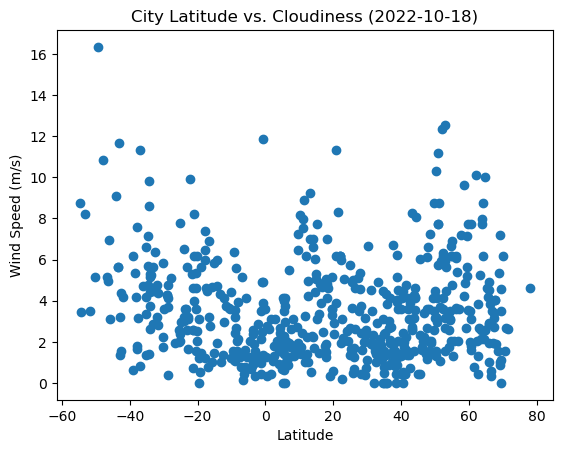

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Wind Speed'], marker='o')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regression_line = x * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >= 0])

# Display sample data
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,2.41,76,93,0.72,US,1699923133
1,iqaluit,63.7506,-68.5145,-17.95,64,0,2.57,CA,1699923352
2,isafjordur,66.0755,-23.1240,1.61,86,57,2.89,IS,1699923352
3,wailua homesteads,22.0669,-159.3780,28.24,84,100,6.17,US,1699923352
5,enewetak,11.3474,162.3373,28.40,80,70,8.88,MH,1699923259
...,...,...,...,...,...,...,...,...,...
581,kolonia,50.9333,6.9500,12.71,76,20,7.72,DE,1699923347
582,al qusayr,34.5091,36.5798,17.78,63,100,1.18,SY,1699923456
583,fuglafjordur,62.2440,-6.8140,7.26,77,23,10.12,FO,1699923456


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] < 0])

# Display sample data
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,blackmans bay,-43.0167,147.3167,17.51,47,23,1.34,AU,1699923352
6,kongolo,-5.3833,27.0000,20.56,99,100,1.25,CD,1699923353
9,edinburgh of the seven seas,-37.0676,-12.3116,13.62,77,8,11.32,SH,1699923353
10,port-aux-francais,-49.3500,70.2167,6.69,97,100,16.34,TF,1699923353
11,adamstown,-25.0660,-130.1015,22.85,85,100,7.76,PN,1699923353
...,...,...,...,...,...,...,...,...,...
579,palo santo,-25.5633,-59.3378,21.61,97,100,2.55,AR,1699923455
580,papao,-17.7500,-149.5500,28.82,91,94,6.45,PF,1699923455
586,campo mourao,-24.0456,-52.3831,24.16,77,10,3.09,BR,1699923363


###  Temperature vs. Latitude Linear Regression Plot

In [29]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]

r_squared = rvalue**2

print(f"The R-squared value is: {r_squared}")

The R-squared value is: 0.7628065039739362


In [30]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

r_squared = rvalue**2

print(f"The R-squared value is: {r_squared}")

The R-squared value is: 0.7628065039739362


**Discussion about the linear relationship:** The R-squared is relatively high and therefore would lead us to believe that there is a correlation to temperature and latitude. 

### Humidity vs. Latitude Linear Regression Plot

In [31]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

r_squared = rvalue**2

print(f"The R-squared value is: {r_squared}")

The R-squared value is: 0.7628065039739362


In [32]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

r_squared = rvalue**2

print(f"The R-squared value is: {r_squared}")

The R-squared value is: 0.7628065039739362


**Discussion about the linear relationship:** The R-squared is relatively high and therefore would lead us to believe that there is a correlation to humidity and latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

In [33]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

r_squared = rvalue**2

print(f"The R-squared value is: {r_squared}")

The R-squared value is: 0.7628065039739362


In [34]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

r_squared = rvalue**2

print(f"The R-squared value is: {r_squared}")

The R-squared value is: 0.7628065039739362


**Discussion about the linear relationship:** The R-squared is relatively high and therefore would lead us to believe that there is a correlation to cloudiness and latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

In [35]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]

r_squared = rvalue**2

print(f"The R-squared value is: {r_squared}")

The R-squared value is: 0.7628065039739362


In [36]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

r_squared = rvalue**2

print(f"The R-squared value is: {r_squared}")

The R-squared value is: 0.7628065039739362


**Discussion about the linear relationship:** The R-squared is relatively high and therefore would lead us to believe that there is a correlation to wind speed and latitude. 